In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [43]:
#device setup
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [44]:
#set up seed for consistancy
torch.manual_seed(1)
batch_size = 64
#get MNIST dataset
data_train = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

data_test = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor(),
                                          download=True)
train_loader = torch.utils.data.DataLoader(data_train, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(data_test, batch_size=batch_size,
                                         shuffle=False)


In [71]:
#Define model 1 
model_one = nn.Sequential(
                nn.Linear(784,400),
                nn.ReLU(),
                nn.Linear(400,9),
                nn.ReLU(),
                nn.Linear(9,10)
                )
#Define model 
model_two = nn.Sequential(
                nn.Linear(784,100),
                nn.ReLU(),
                nn.Linear(100,5),
                nn.ReLU(),
                nn.Linear(5,10)
                )
#Define model 
model_three = nn.Sequential(
                nn.Linear(784,50),
                nn.ReLU(),
                nn.Linear(50,5),
                nn.ReLU(),
                nn.Linear(5,10)
                )
#Define model 
model_four = nn.Sequential(
                nn.Linear(784,600),
                nn.ReLU(),
                nn.Linear(600,50),
                nn.ReLU(),
                nn.Linear(50,10)
                )
#Define model 
model_five = nn.Sequential(
                nn.Linear(784,10),
                nn.ReLU(),
                nn.Linear(10,5),
                nn.ReLU(),
                nn.Linear(5,10)
                )
#Define model 
model_six = nn.Sequential(
                nn.Linear(784,300),
                nn.ReLU(),
                nn.Linear(300,20),
                nn.ReLU(),
                nn.Linear(20,10)
                )
#Define model 
model_seven = nn.Sequential(
                nn.Linear(784,400),
                nn.ReLU(),
                nn.Linear(400,50),
                nn.ReLU(),
                nn.Linear(50,10)
                )
#Define model 
model_eight = nn.Sequential(
                nn.Linear(784,750),
                nn.ReLU(),
                nn.Linear(750,405),
                nn.ReLU(),
                nn.Linear(405,10)
                )
#Define model 
model_nine = nn.Sequential(
                nn.Linear(784,100),
                nn.ReLU(),
                nn.Linear(100,50),
                nn.ReLU(),
                nn.Linear(50,10)
                )
#Define model 
model_ten = nn.Sequential(
                nn.Linear(784,100),
                nn.ReLU(),
                nn.Linear(100,205),
                nn.ReLU(),
                nn.Linear(205,10)
                )

In [72]:
#to set optimizer for current model
def getOpti(model):
    return torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)
#calc parameters of model
def calcParam(model):
    return sum(p.numel() for p in model.parameters())

In [73]:
def trainModel(model):
    n_correct = 0
    n_samples = 0
    count = 0 
    loss_per_batch = 0
    for i, (inputs, labels) in enumerate(train_loader): 
        count +=1
        # get the inputs; data is a list of [inputs, labels]
        #inputs, labels = data
        labels = labels.to(device)
        
        #temp = inputs.view(-1,64)
        #print(temp.shape)
        # zero the parameter gradients
        optimizer_sgd.zero_grad()
        # forward + backward + optimize
        outputs = model(inputs.view(-1,784)).to(device)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer_sgd.step()
        loss_per_batch += loss.data

        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        acc = 100.0 * n_correct / n_samples
    loss_per_batch /= count
    return loss_per_batch,acc

def testModel(model):
    n_correct = 0
    n_samples = 0
    count = 0 
    loss_per_batch = 0
    for i, (inputs, labels) in enumerate(test_loader): 
        count +=1
        # get the inputs; data is a list of [inputs, labels]
        #inputs, labels = data
        labels = labels.to(device)
        # forward + backward + optimize
        outputs = model(inputs.view(-1,784)).to(device)
        loss = loss_func(outputs, labels)
        loss_per_batch += loss.data

        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        acc = 100.0 * n_correct / n_samples
    loss_per_batch /= count
    return loss_per_batch,acc

In [74]:
loss_func = nn.CrossEntropyLoss()

def runEpochs(model):
    max_epochs = 10
    n_loss_train=[]
    n_loss_test=[]
    n_acc_train=[]
    n_acc_test=[]
    for epoch in range(max_epochs):
        loss_train,acc_train=trainModel(model)
        loss_test,acc_test=testModel(model)
        print('Epoch ', epoch,' Loss Traning', loss_train.detach().numpy(),'Accuracy train ',acc_train)
        print('Epoch ', epoch,' Loss test', loss_test.detach().numpy(),'Accuracy test ',acc_test)
    n_loss_train.append(loss_train)
    n_acc_train.append(acc_train)
    n_loss_test.append(loss_test)
    n_acc_test.append(acc_test)
    return loss_train,acc_train,loss_test,acc_test

In [75]:
param_train_loss=[]
param_test_loss=[]
param_train_acc=[]
param_test_acc=[]
params=[]
print('Parameter of model 1 ',calcParam(model_one))
params.append(calcParam(model_one))
optimizer_sgd = getOpti(model_one)
train_loss,train_acc,test_loss,test_acc = runEpochs(model_one)
param_train_loss.append(train_loss)
param_test_loss.append(test_loss)
param_train_acc.append(train_acc)
param_test_acc.append(test_acc)
print('Parameter of model 2 ',calcParam(model_two))
params.append(calcParam(model_two))
optimizer_sgd = getOpti(model_two)
train_loss,train_acc,test_loss,test_acc = runEpochs(model_two)
param_train_loss.append(train_loss)
param_test_loss.append(test_loss)
param_train_acc.append(train_acc)
param_test_acc.append(test_acc)
print('Parameter of model 3 ',calcParam(model_three))
params.append(calcParam(model_three))
optimizer_sgd = getOpti(model_three)
train_loss,train_acc,test_loss,test_acc = runEpochs(model_three)
param_train_loss.append(train_loss)
param_test_loss.append(test_loss)
param_train_acc.append(train_acc)
param_test_acc.append(test_acc)
print('Parameter of model 4 ',calcParam(model_four))
params.append(calcParam(model_four))
optimizer_sgd = getOpti(model_four)
train_loss,train_acc,test_loss,test_acc = runEpochs(model_four)
param_train_loss.append(train_loss)
param_test_loss.append(test_loss)
param_train_acc.append(train_acc)
param_test_acc.append(test_acc)
print('Parameter of model 5 ',calcParam(model_five))
params.append(calcParam(model_five))
optimizer_sgd = getOpti(model_five)
train_loss,train_acc,test_loss,test_acc = runEpochs(model_five)
param_train_loss.append(train_loss)
param_test_loss.append(test_loss)
param_train_acc.append(train_acc)
param_test_acc.append(test_acc)
print('Parameter of model 6 ',calcParam(model_six))
params.append(calcParam(model_six))
optimizer_sgd = getOpti(model_six)
train_loss,train_acc,test_loss,test_acc = runEpochs(model_six)
param_train_loss.append(train_loss)
param_test_loss.append(test_loss)
param_train_acc.append(train_acc)
param_test_acc.append(test_acc)
print('Parameter of model 7 ',calcParam(model_seven))
params.append(calcParam(model_seven))
optimizer_sgd = getOpti(model_seven)
train_loss,train_acc,test_loss,test_acc = runEpochs(model_seven)
param_train_loss.append(train_loss)
param_test_loss.append(test_loss)
param_train_acc.append(train_acc)
param_test_acc.append(test_acc)
print('Parameter of model 8 ',calcParam(model_eight))
params.append(calcParam(model_eight))
optimizer_sgd = getOpti(model_eight)
train_loss,train_acc,test_loss,test_acc = runEpochs(model_eight)
param_train_loss.append(train_loss)
param_test_loss.append(test_loss)
param_train_acc.append(train_acc)
param_test_acc.append(test_acc)
print('Parameter of model 9 ',calcParam(model_nine))
params.append(calcParam(model_nine))
optimizer_sgd = getOpti(model_nine)
train_loss,train_acc,test_loss,test_acc = runEpochs(model_nine)
param_train_loss.append(train_loss)
param_test_loss.append(test_loss)
param_train_acc.append(train_acc)
param_test_acc.append(test_acc)
print('Parameter of model 10 ',calcParam(model_ten))
params.append(calcParam(model_ten))
optimizer_sgd = getOpti(model_ten)
train_loss,train_acc,test_loss,test_acc = runEpochs(model_ten)
param_train_loss.append(train_loss)
param_test_loss.append(test_loss)
param_train_acc.append(train_acc)
param_test_acc.append(test_acc)

Parameter of model 1  317709
Epoch  0  Loss Traning 2.2995079 Accuracy train  9.898333333333333
Epoch  0  Loss test 2.2777555 Accuracy test  10.21
Epoch  1  Loss Traning 2.2509577 Accuracy train  13.905
Epoch  1  Loss test 2.2211974 Accuracy test  18.39
Epoch  2  Loss Traning 2.186115 Accuracy train  29.031666666666666
Epoch  2  Loss test 2.1435583 Accuracy test  41.64
Epoch  3  Loss Traning 2.0951464 Accuracy train  45.605
Epoch  3  Loss test 2.0347412 Accuracy test  47.26
Epoch  4  Loss Traning 1.9723065 Accuracy train  46.32666666666667
Epoch  4  Loss test 1.8954773 Accuracy test  46.77
Epoch  5  Loss Traning 1.8251334 Accuracy train  47.63166666666667
Epoch  5  Loss test 1.7377294 Accuracy test  50.01
Epoch  6  Loss Traning 1.6643823 Accuracy train  52.01
Epoch  6  Loss test 1.5698705 Accuracy test  54.46
Epoch  7  Loss Traning 1.4960341 Accuracy train  57.10166666666667
Epoch  7  Loss test 1.397971 Accuracy test  60.07
Epoch  8  Loss Traning 1.3307066 Accuracy train  62.445
Epoch 

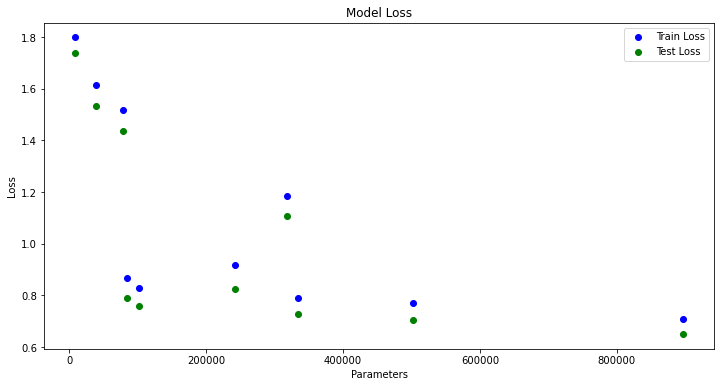

In [78]:
plt.figure(figsize=(12,6))
plt.scatter(params, param_train_loss, color = "b")
plt.scatter(params, param_test_loss, color = "g")
#plt.xlim(6000, 1262010)  
plt.title('Model Loss')
plt.legend(['Train Loss', 'Test Loss'])
plt.xlabel('Parameters')
plt.ylabel('Loss')
plt.show()

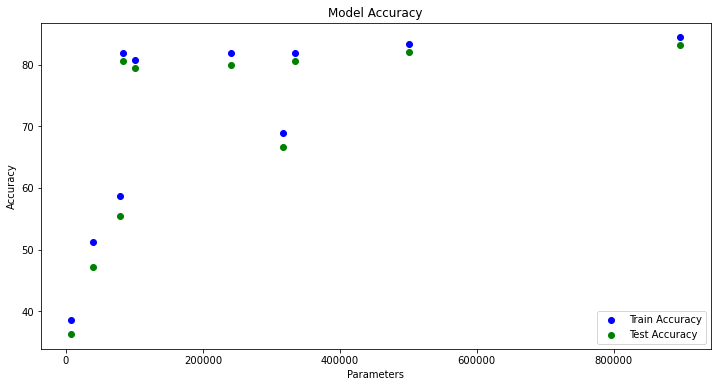

In [79]:
plt.figure(figsize=(12,6))
plt.scatter(params, param_test_acc, color = "b")
plt.scatter(params, param_train_acc, color = "g")
#plt.xlim(6000, 1262010)  
plt.title('Model Accuracy')
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.xlabel('Parameters')
plt.ylabel('Accuracy')
plt.show()

In [80]:
print(params)

[317709, 79065, 39565, 501560, 7965, 241730, 334560, 896965, 84060, 101265]


In [81]:
max(params)

896965